# Things to Tune
* Resolution (64 x 64)
* Number of layers
* Units per layer
* Convolution size (4x4)
* Color vs. grayscale
* Dropout
* Data Augmentation

### Data Generation
* Resample Size
* Color vs. grayscale
* Data Augmentation

In [2]:
# run then restart kernel
pip install Pillow --user

     |████████████████████████████████| 2.1MB 1.2MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# run, no need to restart?
pip install Keras --user

     |████████████████████████████████| 378kB 1.0MB/s eta 0:00:01
     |████████████████████████████████| 276kB 1.6MB/s eta 0:00:01
Failed to build pyyaml
    Running setup.py install for pyyaml ... done
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [29]:
import os
import time
import matplotlib.pyplot as plt
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models, layers
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

np.random.seed(123)

In [4]:
# memory management, didn't get working yet, only needed for desktop training
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.9)

AttributeError: module 'tensorflow' has no attribute 'GPUOptions'

In [13]:
train_folder = os.path.join('train')
train_pneum = os.path.join(train_folder, 'PNEUMONIA')
train_norm = os.path.join(train_folder, 'NORMAL')

test_folder = os.path.join('test')
test_pneum = os.path.join(test_folder, 'PNEUMONIA')
test_norm = os.path.join(test_folder, 'NORMAL')

val_folder = os.path.join('val')
val_pneum = os.path.join(val_folder, 'PNEUMONIA')
val_norm = os.path.join(val_folder, 'NORMAL')

In [14]:
print('There are', len(os.listdir(train_pneum)), 'pneumonia images in the train set')
print('There are', len(os.listdir(train_norm)), 'normal images in the train set')
print('There are', len(os.listdir(test_pneum)), 'pneumonia images in the test set')
print('There are', len(os.listdir(test_norm)), 'normal images in the test set')
print('There are', len(os.listdir(val_pneum)), 'pneumonia images in the val set')
print('There are', len(os.listdir(val_norm)), 'normal images in the val set')

There are 3876 pneumonia images in the train set
There are 1342 normal images in the train set
There are 390 pneumonia images in the test set
There are 234 normal images in the test set
There are 9 pneumonia images in the val set
There are 9 normal images in the val set


# Model 1 (64x64)

In [15]:
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(train_folder, target_size=(64, 64), batch_size = 5218)

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(test_folder, target_size=(64, 64), batch_size = 624)

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(val_folder, target_size=(64, 64), batch_size = 18)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [16]:
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [17]:
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

train_images shape: (5216, 64, 64, 3)
train_labels shape: (5216, 2)
test_images shape: (624, 64, 64, 3)
test_labels shape: (624, 2)
val_images shape: (16, 64, 64, 3)
val_labels shape: (16, 2)


In [18]:
train_y = np.reshape(train_labels[:,0], (5216,1))
test_y = np.reshape(test_labels[:,0], (624,1))
val_y = np.reshape(val_labels[:,0], (16,1))

In [11]:
model_1 = models.Sequential()
model_1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model_1.add(layers.MaxPooling2D((2, 2)))

model_1.add(layers.Conv2D(32, (4, 4), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))

model_1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))

model_1.add(layers.Flatten())
model_1.add(layers.Dense(64, activation='relu'))
model_1.add(layers.Dense(1, activation='sigmoid'))

model_1.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['acc'])

In [12]:
%%time
history_1 = model_1.fit(train_images,
                    train_y,
                    epochs=30,
                    batch_size=50,
                    validation_data=(val_images, val_y))

Train on 5216 samples, validate on 16 samples
Epoch 1/30
5216/5216 [==============================] - 2s 434us/step - loss: 0.5722 - acc: 0.7395 - val_loss: 0.7536 - val_acc: 0.5000
Epoch 2/30
5216/5216 [==============================] - 1s 205us/step - loss: 0.5332 - acc: 0.7437 - val_loss: 1.1023 - val_acc: 0.5000
Epoch 3/30
5216/5216 [==============================] - 1s 203us/step - loss: 0.4813 - acc: 0.7657 - val_loss: 0.6880 - val_acc: 0.6250
Epoch 4/30
5216/5216 [==============================] - 1s 208us/step - loss: 0.4153 - acc: 0.8140 - val_loss: 0.9815 - val_acc: 0.5625
Epoch 5/30
5216/5216 [==============================] - 1s 208us/step - loss: 0.3299 - acc: 0.8627 - val_loss: 0.5643 - val_acc: 0.7500
Epoch 6/30
5216/5216 [==============================] - 1s 202us/step - loss: 0.2664 - acc: 0.8890 - val_loss: 0.8118 - val_acc: 0.6250
Epoch 7/30
5216/5216 [==============================] - 1s 206us/step - loss: 0.2280 - acc: 0.9072 - val_loss: 0.9544 - val_acc: 0.5625
Ep

In [13]:
results_test_1 = model_1.evaluate(test_images, test_y)

624/624 [==============================] - 0s 175us/step


In [14]:
results_test_1

[0.9626823526162368, 0.7387820482254028]

In [14]:
def evaluate_test(model, test_X, test_y):
    results = model.evaluate(test_X, test_y)
    print('Loss:', results[0])
    print('Accuracy:', results[1])

Final epoch loss: 0.08488311319921932
Final epoch accuracy: 0.9689417


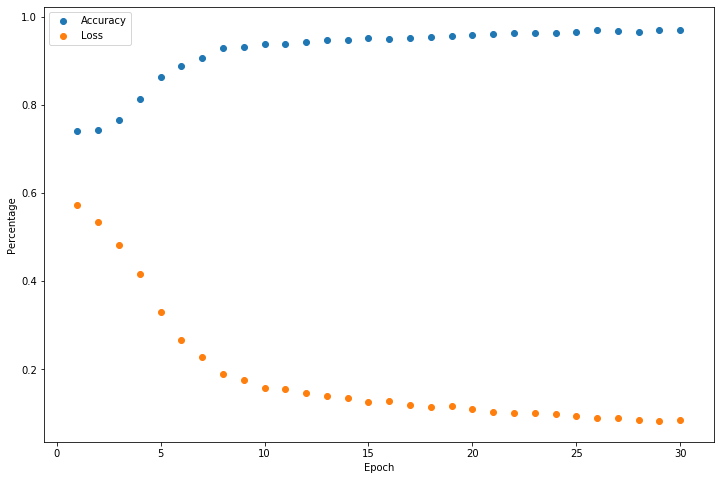

In [17]:
plot_history(history_1)

# Stop Here LOL

## 64x64, Baseline, 100 Epochs

In [56]:
model_100 = models.Sequential()
model_100.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model_100.add(layers.MaxPooling2D((2, 2)))

model_100.add(layers.Conv2D(32, (4, 4), activation='relu'))
model_100.add(layers.MaxPooling2D((2, 2)))

model_100.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_100.add(layers.MaxPooling2D((2, 2)))

model_100.add(layers.Flatten())
model_100.add(layers.Dense(64, activation='relu'))
model_100.add(layers.Dense(1, activation='sigmoid'))

model_100.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['acc'])

In [57]:
%%time
history_100 = model_100.fit(train_images,
                    train_y,
                    epochs=100,
                    batch_size=50,
                    validation_data=(val_images, val_y))

Train on 5216 samples, validate on 16 samples
Epoch 1/100
5216/5216 [==============================] - 1s 229us/step - loss: 0.5775 - acc: 0.7427 - val_loss: 0.8101 - val_acc: 0.5000
Epoch 2/100
5216/5216 [==============================] - 1s 203us/step - loss: 0.5371 - acc: 0.7429 - val_loss: 0.8238 - val_acc: 0.5000
Epoch 3/100
5216/5216 [==============================] - 1s 200us/step - loss: 0.4679 - acc: 0.7747 - val_loss: 0.6513 - val_acc: 0.5625
Epoch 4/100
5216/5216 [==============================] - 1s 205us/step - loss: 0.3751 - acc: 0.8351 - val_loss: 0.6841 - val_acc: 0.6875
Epoch 5/100
5216/5216 [==============================] - 1s 205us/step - loss: 0.2982 - acc: 0.8746 - val_loss: 1.0028 - val_acc: 0.5625
Epoch 6/100
5216/5216 [==============================] - 1s 202us/step - loss: 0.2328 - acc: 0.9066 - val_loss: 0.4509 - val_acc: 0.8125
Epoch 7/100
5216/5216 [==============================] - 1s 202us/step - loss: 0.2013 - acc: 0.9176 - val_loss: 0.5422 - val_acc: 0.

In [58]:
results_test_100 = model_100.evaluate(test_images, test_y)
results_test_100

624/624 [==============================] - 0s 119us/step


[1.2591797755314753, 0.7596153616905212]

Final epoch loss: 0.03272779743328899
Final epoch accuracy: 0.98753834


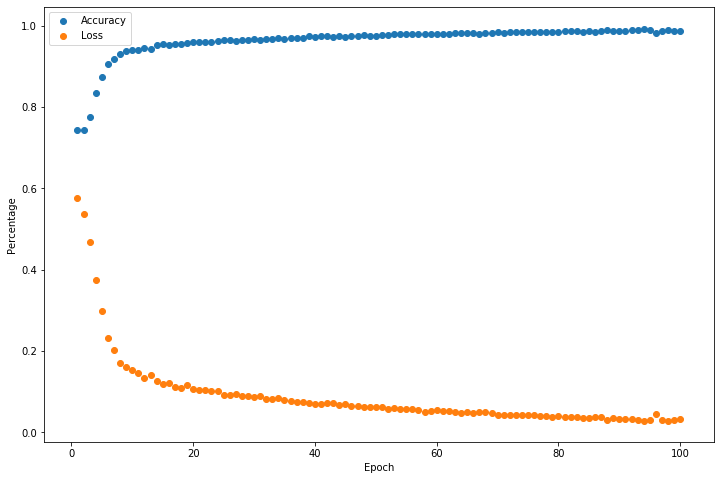

In [59]:
# go to bottom and run the cell that defines plot_history()
plot_history(history_100)

## 64x64, Baseline, Dropout

In [26]:
model_1d = models.Sequential()

model_1d.add(Dropout(.3, input_shape=(64, 64, 3)))

model_1d.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_1d.add(layers.MaxPooling2D((2, 2)))

model_1d.add(layers.Conv2D(32, (4, 4), activation='relu'))
model_1d.add(layers.MaxPooling2D((2, 2)))

model_1d.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_1d.add(layers.MaxPooling2D((2, 2)))

model_1d.add(layers.Flatten())
model_1d.add(layers.Dense(64, activation='relu'))
model_1d.add(layers.Dense(1, activation='sigmoid'))

model_1d.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['acc'])

In [27]:
%%time
history_1_d = model_1d.fit(train_images,
                    train_y,
                    epochs=30,
                    batch_size=50,
                    validation_data=(val_images, val_y))

Train on 5216 samples, validate on 16 samples
Epoch 1/30
5216/5216 [==============================] - 1s 248us/step - loss: 0.5561 - acc: 0.7377 - val_loss: 0.7079 - val_acc: 0.5000
Epoch 2/30
5216/5216 [==============================] - 1s 215us/step - loss: 0.4982 - acc: 0.7644 - val_loss: 0.6897 - val_acc: 0.5625
Epoch 3/30
5216/5216 [==============================] - 1s 216us/step - loss: 0.4345 - acc: 0.8043 - val_loss: 0.8575 - val_acc: 0.5625
Epoch 4/30
5216/5216 [==============================] - 1s 216us/step - loss: 0.3601 - acc: 0.8439 - val_loss: 0.6499 - val_acc: 0.6250
Epoch 5/30
5216/5216 [==============================] - 1s 217us/step - loss: 0.2938 - acc: 0.8731 - val_loss: 0.6162 - val_acc: 0.5625
Epoch 6/30
5216/5216 [==============================] - 1s 216us/step - loss: 0.2553 - acc: 0.8924 - val_loss: 0.9248 - val_acc: 0.5625
Epoch 7/30
5216/5216 [==============================] - 1s 220us/step - loss: 0.2239 - acc: 0.9091 - val_loss: 0.5713 - val_acc: 0.6875
Ep

In [28]:
results_test_1d = model_1d.evaluate(test_images, test_y)
results_test_1d

624/624 [==============================] - 0s 146us/step


[0.8363092205463312, 0.7147436141967773]

## 64x64, Baseline, Dropout, 100 Epochs

In [20]:
model_100d = models.Sequential()

model_100d.add(Dropout(.3, input_shape=(64, 64, 3)))

model_100d.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_100d.add(layers.MaxPooling2D((2, 2)))

model_100d.add(layers.Conv2D(32, (4, 4), activation='relu'))
model_100d.add(layers.MaxPooling2D((2, 2)))

model_100d.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_100d.add(layers.MaxPooling2D((2, 2)))

model_100d.add(layers.Flatten())
model_100d.add(layers.Dense(64, activation='relu'))
model_100d.add(layers.Dense(1, activation='sigmoid'))

model_100d.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['acc'])

In [22]:
%%time
history_100_d = model_100d.fit(train_images,
                    train_y,
                    epochs=100,
                    batch_size=50,
                    validation_data=(val_images, val_y))

Train on 5216 samples, validate on 16 samples
Epoch 1/100
5216/5216 [==============================] - 2s 467us/step - loss: 0.5602 - acc: 0.7379 - val_loss: 0.7049 - val_acc: 0.5000
Epoch 2/100
5216/5216 [==============================] - 1s 218us/step - loss: 0.4959 - acc: 0.7542 - val_loss: 0.9159 - val_acc: 0.5000
Epoch 3/100
5216/5216 [==============================] - 1s 230us/step - loss: 0.4162 - acc: 0.8064 - val_loss: 0.6785 - val_acc: 0.6250
Epoch 4/100
5216/5216 [==============================] - 1s 224us/step - loss: 0.3283 - acc: 0.8535 - val_loss: 0.7683 - val_acc: 0.6250
Epoch 5/100
5216/5216 [==============================] - 1s 220us/step - loss: 0.2626 - acc: 0.8947 - val_loss: 0.7157 - val_acc: 0.6250
Epoch 6/100
5216/5216 [==============================] - 1s 216us/step - loss: 0.2203 - acc: 0.9099 - val_loss: 0.6260 - val_acc: 0.6250
Epoch 7/100
5216/5216 [==============================] - 1s 214us/step - loss: 0.2023 - acc: 0.9164 - val_loss: 0.7353 - val_acc: 0.

In [23]:
results_test_100d = model_100d.evaluate(test_images, test_y)
results_test_100d

624/624 [==============================] - 0s 183us/step


[0.6903790632883707, 0.7644230723381042]

## 64x64, Baseline, Dropout, 200 Epochs, Early Stopping

In [30]:
model_200de = models.Sequential()

model_200de.add(Dropout(.3, input_shape=(64, 64, 3)))

model_200de.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_200de.add(layers.MaxPooling2D((2, 2)))

model_200de.add(layers.Conv2D(32, (4, 4), activation='relu'))
model_200de.add(layers.MaxPooling2D((2, 2)))

model_200de.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_200de.add(layers.MaxPooling2D((2, 2)))

model_200de.add(layers.Flatten())
model_200de.add(layers.Dense(64, activation='relu'))
model_200de.add(layers.Dense(1, activation='sigmoid'))

model_200de.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['acc'])

In [33]:
%%time
early_stopping = [EarlyStopping(monitor='val_loss', patience = 10)]
history_200_de = model_200de.fit(train_images,
                    train_y,
                    epochs=200,
                    batch_size=50,
                    validation_data=(val_images, val_y),
                    callbacks = early_stopping)

Train on 5216 samples, validate on 16 samples
Epoch 1/200
5216/5216 [==============================] - 1s 208us/step - loss: 0.3559 - acc: 0.8461 - val_loss: 0.6718 - val_acc: 0.6250
Epoch 2/200
5216/5216 [==============================] - 1s 209us/step - loss: 0.2869 - acc: 0.8800 - val_loss: 1.1230 - val_acc: 0.5625
Epoch 3/200
5216/5216 [==============================] - 1s 209us/step - loss: 0.2544 - acc: 0.8905 - val_loss: 0.5228 - val_acc: 0.7500
Epoch 4/200
5216/5216 [==============================] - 1s 211us/step - loss: 0.2232 - acc: 0.9062 - val_loss: 0.6761 - val_acc: 0.5000
Epoch 5/200
5216/5216 [==============================] - 1s 210us/step - loss: 0.2037 - acc: 0.9126 - val_loss: 0.4747 - val_acc: 0.8125
Epoch 6/200
5216/5216 [==============================] - 1s 212us/step - loss: 0.1826 - acc: 0.9262 - val_loss: 0.4010 - val_acc: 0.8750
Epoch 7/200
5216/5216 [==============================] - 1s 209us/step - loss: 0.1817 - acc: 0.9264 - val_loss: 0.5374 - val_acc: 0.

## Model 2, 64x64, Double Filters

In [18]:
model_2 = models.Sequential()
model_2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.Conv2D(64, (4, 4), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.Flatten())
model_2.add(layers.Dense(64, activation='relu'))
model_2.add(layers.Dense(1, activation='sigmoid'))

model_2.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['acc'])

In [19]:
%%time
history_2 = model_2.fit(train_images,
                    train_y,
                    epochs=30,
                    batch_size=50,
                    validation_data=(val_images, val_y))

Train on 5216 samples, validate on 16 samples
Epoch 1/30
5216/5216 [==============================] - 2s 317us/step - loss: 0.5655 - acc: 0.7421 - val_loss: 0.9347 - val_acc: 0.5000
Epoch 2/30
5216/5216 [==============================] - 1s 273us/step - loss: 0.5070 - acc: 0.7496 - val_loss: 1.2324 - val_acc: 0.5000
Epoch 3/30
5216/5216 [==============================] - 1s 270us/step - loss: 0.4574 - acc: 0.7970 - val_loss: 0.8712 - val_acc: 0.5625
Epoch 4/30
5216/5216 [==============================] - 1s 262us/step - loss: 0.3625 - acc: 0.8445 - val_loss: 1.1172 - val_acc: 0.5625
Epoch 5/30
5216/5216 [==============================] - 1s 271us/step - loss: 0.2871 - acc: 0.8804 - val_loss: 0.4926 - val_acc: 0.8125
Epoch 6/30
5216/5216 [==============================] - 1s 275us/step - loss: 0.2386 - acc: 0.9016 - val_loss: 0.5915 - val_acc: 0.7500
Epoch 7/30
5216/5216 [==============================] - 1s 264us/step - loss: 0.1994 - acc: 0.9220 - val_loss: 0.4401 - val_acc: 0.8125
Ep

In [21]:
results_test_2 = model_2.evaluate(test_images, test_y)
results_test_2

624/624 [==============================] - 0s 142us/step


[0.5773699039067978, 0.8060897588729858]

Final epoch loss: 0.08631596714936689
Final epoch accuracy: 0.9679831


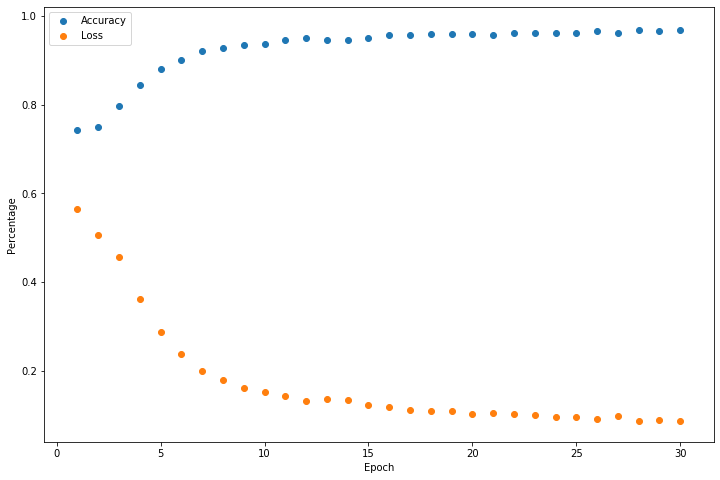

In [22]:
plot_history(history_2)

## Model 3, 64x64, Quad Filters

In [27]:
model_3 = models.Sequential()
model_3.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model_3.add(layers.MaxPooling2D((2, 2)))

model_3.add(layers.Conv2D(128, (4, 4), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))

model_3.add(layers.Conv2D(256, (3, 3), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))

model_3.add(layers.Flatten())
model_3.add(layers.Dense(128, activation='relu'))
model_3.add(layers.Dense(1, activation='sigmoid'))

model_3.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['acc'])

In [28]:
%%time
history_3 = model_3.fit(train_images,
                    train_y,
                    epochs=30,
                    batch_size=50,
                    validation_data=(val_images, val_y))

Train on 5216 samples, validate on 16 samples
Epoch 1/30
5216/5216 [==============================] - 3s 622us/step - loss: 0.5758 - acc: 0.7429 - val_loss: 0.7273 - val_acc: 0.5000
Epoch 2/30
5216/5216 [==============================] - 3s 550us/step - loss: 0.5436 - acc: 0.7429 - val_loss: 0.8460 - val_acc: 0.5000
Epoch 3/30
5216/5216 [==============================] - 3s 540us/step - loss: 0.4861 - acc: 0.7703 - val_loss: 0.6226 - val_acc: 0.6250
Epoch 4/30
5216/5216 [==============================] - 3s 541us/step - loss: 0.4210 - acc: 0.8129 - val_loss: 1.0362 - val_acc: 0.5625
Epoch 5/30
5216/5216 [==============================] - 3s 551us/step - loss: 0.3509 - acc: 0.8474 - val_loss: 0.6801 - val_acc: 0.6250
Epoch 6/30
5216/5216 [==============================] - 3s 541us/step - loss: 0.2841 - acc: 0.8817 - val_loss: 0.6877 - val_acc: 0.6250
Epoch 7/30
5216/5216 [==============================] - 3s 533us/step - loss: 0.2278 - acc: 0.9095 - val_loss: 0.5517 - val_acc: 0.7500
Ep

In [29]:
results_test_3 = model_3.evaluate(test_images, test_y)
results_test_3

624/624 [==============================] - 0s 288us/step


[0.5247454979480841, 0.8189102411270142]

Final epoch loss: 0.08480523987473246
Final epoch accuracy: 0.9699003


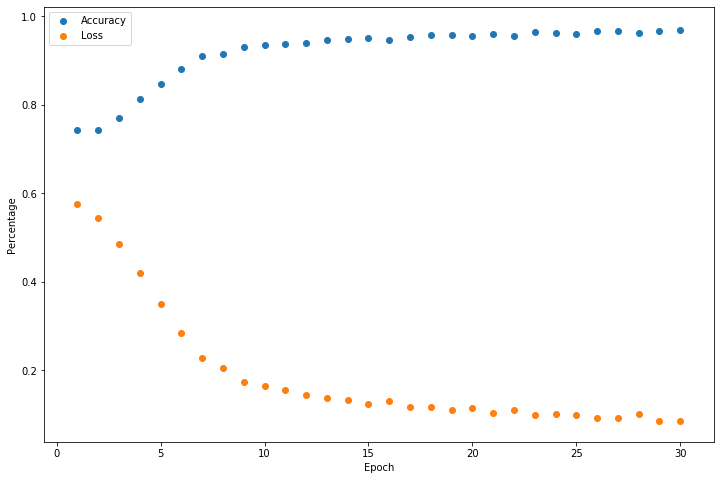

In [30]:
plot_history(history_3)

### Model 4, 64x64, Additional 5x5 Layer

In [23]:
model_4 = models.Sequential()
model_4.add(layers.Conv2D(32, (4, 4), activation='relu', input_shape=(64, 64, 3))) # kernel size increased to (4x4)
model_4.add(layers.MaxPooling2D((2, 2)))

model_4.add(layers.Conv2D(32, (5, 5), activation='relu'))               # new 5v5 convlution layer
model_4.add(layers.MaxPooling2D((2, 2)))

model_4.add(layers.Conv2D(64, (4, 4), activation='relu'))
model_4.add(layers.MaxPooling2D((2, 2)))

model_4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_4.add(layers.MaxPooling2D((2, 2)))

model_4.add(layers.Flatten())
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(1, activation='sigmoid'))

model_4.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['acc'])

In [24]:
%%time
history_4 = model_4.fit(train_images,
                    train_y,
                    epochs=30,
                    batch_size=50,
                    validation_data=(val_images, val_y))

Train on 5216 samples, validate on 16 samples
Epoch 1/30
5216/5216 [==============================] - 2s 302us/step - loss: 0.5835 - acc: 0.7356 - val_loss: 0.8136 - val_acc: 0.5000
Epoch 2/30
5216/5216 [==============================] - 1s 228us/step - loss: 0.5565 - acc: 0.7429 - val_loss: 0.8900 - val_acc: 0.5000
Epoch 3/30
5216/5216 [==============================] - 1s 226us/step - loss: 0.5395 - acc: 0.7429 - val_loss: 0.7677 - val_acc: 0.5000
Epoch 4/30
5216/5216 [==============================] - 1s 232us/step - loss: 0.5082 - acc: 0.7508 - val_loss: 0.7681 - val_acc: 0.5625
Epoch 5/30
5216/5216 [==============================] - 1s 228us/step - loss: 0.4821 - acc: 0.7655 - val_loss: 1.1471 - val_acc: 0.5000
Epoch 6/30
5216/5216 [==============================] - 1s 229us/step - loss: 0.4296 - acc: 0.8025 - val_loss: 0.5408 - val_acc: 0.8125
Epoch 7/30
5216/5216 [==============================] - 1s 235us/step - loss: 0.3780 - acc: 0.8319 - val_loss: 0.4919 - val_acc: 0.7500
Ep

In [25]:
results_test_4 = model_4.evaluate(test_images, test_y)
results_test_4

624/624 [==============================] - 0s 186us/step


[0.9953965896215194, 0.7163461446762085]

Final epoch loss: 0.10499009244183959
Final epoch accuracy: 0.96165645


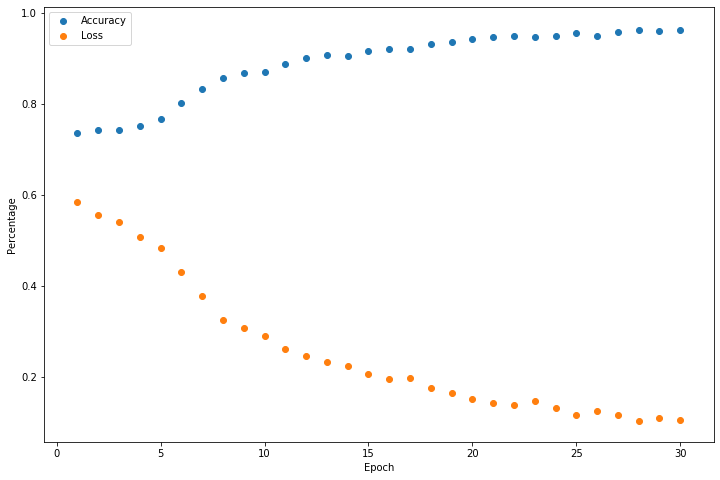

In [26]:
plot_history(history_4)

### 64x64, An additional 4x4 layer

In [31]:
model_5 = models.Sequential()
model_5.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3))) # kernel size (3x3)
model_5.add(layers.MaxPooling2D((2, 2)))

model_5.add(layers.Conv2D(32, (4, 4), activation='relu'))               # new 4x4 convlution layer
model_5.add(layers.MaxPooling2D((2, 2)))

model_5.add(layers.Conv2D(64, (4, 4), activation='relu'))
model_5.add(layers.MaxPooling2D((2, 2)))

model_5.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_5.add(layers.MaxPooling2D((2, 2)))

model_5.add(layers.Flatten())
model_5.add(layers.Dense(64, activation='relu'))
model_5.add(layers.Dense(1, activation='sigmoid'))

model_5.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['acc'])

In [32]:
%%time
history_5 = model_5.fit(train_images,
                    train_y,
                    epochs=30,
                    batch_size=50,
                    validation_data=(val_images, val_y))

Train on 5216 samples, validate on 16 samples
Epoch 1/30
5216/5216 [==============================] - 1s 272us/step - loss: 0.6152 - acc: 0.7366 - val_loss: 0.8128 - val_acc: 0.5000
Epoch 2/30
5216/5216 [==============================] - 1s 231us/step - loss: 0.5664 - acc: 0.7429 - val_loss: 0.7977 - val_acc: 0.5000
Epoch 3/30
5216/5216 [==============================] - 1s 236us/step - loss: 0.5599 - acc: 0.7429 - val_loss: 0.8502 - val_acc: 0.5000
Epoch 4/30
5216/5216 [==============================] - 1s 222us/step - loss: 0.5491 - acc: 0.7429 - val_loss: 0.7530 - val_acc: 0.5000
Epoch 5/30
5216/5216 [==============================] - 1s 222us/step - loss: 0.5242 - acc: 0.7429 - val_loss: 0.6789 - val_acc: 0.5625
Epoch 6/30
5216/5216 [==============================] - 1s 222us/step - loss: 0.4690 - acc: 0.7717 - val_loss: 0.5870 - val_acc: 0.7500
Epoch 7/30
5216/5216 [==============================] - 1s 222us/step - loss: 0.4264 - acc: 0.8037 - val_loss: 0.5629 - val_acc: 0.7500
Ep

In [33]:
results_test_5 = model_5.evaluate(test_images, test_y)
results_test_5

624/624 [==============================] - 0s 142us/step


[0.8801909562868949, 0.7035256624221802]

Final epoch loss: 0.14147452571560726
Final epoch accuracy: 0.94344324


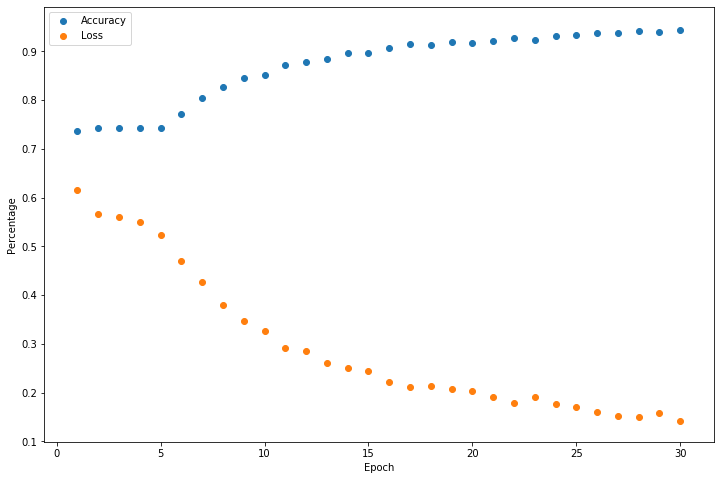

In [34]:
plot_history(history_5)

# Grayscale

In [35]:
train_generator_gs = ImageDataGenerator(rescale=1./255).flow_from_directory(train_folder, target_size=(64, 64), color_mode = 'grayscale', batch_size = 5218)

test_generator_gs = ImageDataGenerator(rescale=1./255).flow_from_directory(test_folder, target_size=(64, 64), color_mode = 'grayscale', batch_size = 624)

val_generator_gs = ImageDataGenerator(rescale=1./255).flow_from_directory(val_folder, target_size=(64, 64), color_mode = 'grayscale', batch_size = 18)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [36]:
train_images_gs, train_labels_gs = next(train_generator_gs)
test_images_gs, test_labels_gs = next(test_generator_gs)
val_images_gs, val_labels_gs = next(val_generator_gs)

In [37]:
print ("train_images shape: " + str(train_images_gs.shape))
print ("train_labels shape: " + str(train_labels_gs.shape))
print ("test_images shape: " + str(test_images_gs.shape))
print ("test_labels shape: " + str(test_labels_gs.shape))
print ("val_images shape: " + str(val_images_gs.shape))
print ("val_labels shape: " + str(val_labels_gs.shape))

train_images shape: (5216, 64, 64, 1)
train_labels shape: (5216, 2)
test_images shape: (624, 64, 64, 1)
test_labels shape: (624, 2)
val_images shape: (16, 64, 64, 1)
val_labels shape: (16, 2)


In [43]:
train_y_gs = np.reshape(train_labels_gs[:,0], (5216,1))
test_y_gs = np.reshape(test_labels_gs[:,0], (624,1))
val_y_gs = np.reshape(val_labels_gs[:,0], (16,1))

In [44]:
model_gs_1 = models.Sequential()
model_gs_1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model_gs_1.add(layers.MaxPooling2D((2, 2)))

model_gs_1.add(layers.Conv2D(32, (4, 4), activation='relu'))
model_gs_1.add(layers.MaxPooling2D((2, 2)))

model_gs_1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_gs_1.add(layers.MaxPooling2D((2, 2)))

model_gs_1.add(layers.Flatten())
model_gs_1.add(layers.Dense(64, activation='relu'))
model_gs_1.add(layers.Dense(1, activation='sigmoid'))

model_gs_1.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['acc'])

In [45]:
%%time
history_gs_1 = model_gs_1.fit(train_images_gs,
                    train_y_gs,
                    epochs=30,
                    batch_size=50,
                    validation_data=(val_images_gs, val_y_gs))

Train on 5216 samples, validate on 16 samples
Epoch 1/30
5216/5216 [==============================] - 1s 225us/step - loss: 0.5854 - acc: 0.7429 - val_loss: 0.8104 - val_acc: 0.5000
Epoch 2/30
5216/5216 [==============================] - 1s 187us/step - loss: 0.5669 - acc: 0.7429 - val_loss: 0.8121 - val_acc: 0.5000
Epoch 3/30
5216/5216 [==============================] - 1s 187us/step - loss: 0.5548 - acc: 0.7429 - val_loss: 0.9515 - val_acc: 0.5000
Epoch 4/30
5216/5216 [==============================] - 1s 194us/step - loss: 0.5348 - acc: 0.7429 - val_loss: 0.8673 - val_acc: 0.5000
Epoch 5/30
5216/5216 [==============================] - 1s 197us/step - loss: 0.4778 - acc: 0.7548 - val_loss: 1.0455 - val_acc: 0.5000
Epoch 6/30
5216/5216 [==============================] - 1s 198us/step - loss: 0.4307 - acc: 0.8100 - val_loss: 0.6622 - val_acc: 0.6250
Epoch 7/30
5216/5216 [==============================] - 1s 199us/step - loss: 0.3784 - acc: 0.8336 - val_loss: 1.0096 - val_acc: 0.5625
Ep

In [48]:
results_test_gs_1 = model_gs_1.evaluate(test_images_gs, test_y_gs)
results_test_gs_1

624/624 [==============================] - 0s 146us/step


[0.8811382085849078, 0.7307692170143127]

# Grayscale, 256, 100 epochs

In [66]:
train_generator_gs_256 = ImageDataGenerator(rescale=1./255).flow_from_directory(train_folder, target_size=(256, 256), color_mode = 'grayscale', batch_size = 5218)

test_generator_gs_256 = ImageDataGenerator(rescale=1./255).flow_from_directory(test_folder, target_size=(256, 256), color_mode = 'grayscale', batch_size = 624)

val_generator_gs_256 = ImageDataGenerator(rescale=1./255).flow_from_directory(val_folder, target_size=(256, 256), color_mode = 'grayscale', batch_size = 18)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [67]:
train_images_gs_256, train_labels_gs_256 = next(train_generator_gs_256)
test_images_gs_256, test_labels_gs_256 = next(test_generator_gs_256)
val_images_gs_256, val_labels_gs_256 = next(val_generator_gs_256)

In [68]:
train_y_gs_256 = np.reshape(train_labels_gs_256[:,0], (5216,1))
test_y_gs_256 = np.reshape(test_labels_gs_256[:,0], (624,1))
val_y_gs_256 = np.reshape(val_labels_gs_256[:,0], (16,1))

In [69]:
model_gs_2 = models.Sequential()
model_gs_2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))
model_gs_2.add(layers.MaxPooling2D((2, 2)))

model_gs_2.add(layers.Conv2D(32, (4, 4), activation='relu'))
model_gs_2.add(layers.MaxPooling2D((2, 2)))

model_gs_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_gs_2.add(layers.MaxPooling2D((2, 2)))

model_gs_2.add(layers.Flatten())
model_gs_2.add(layers.Dense(64, activation='relu'))
model_gs_2.add(layers.Dense(1, activation='sigmoid'))

model_gs_2.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['acc'])

In [73]:
%%time
history_gs_2 = model_gs_2.fit(train_images_gs_256,
                    train_y_gs_256,
                    epochs=100,
                    batch_size=50,
                    validation_data=(val_images_gs_256, val_y_gs_256))

Train on 5216 samples, validate on 16 samples
Epoch 1/100
5216/5216 [==============================] - 12s 2ms/step - loss: 0.1591 - acc: 0.9413 - val_loss: 0.3945 - val_acc: 0.7500
Epoch 2/100
5216/5216 [==============================] - 12s 2ms/step - loss: 0.1486 - acc: 0.9434 - val_loss: 0.3377 - val_acc: 0.8750
Epoch 3/100
5216/5216 [==============================] - 12s 2ms/step - loss: 0.1413 - acc: 0.9484 - val_loss: 0.3801 - val_acc: 0.8125
Epoch 4/100
5216/5216 [==============================] - 12s 2ms/step - loss: 0.1354 - acc: 0.9511 - val_loss: 1.0466 - val_acc: 0.5625
Epoch 5/100
5216/5216 [==============================] - 13s 2ms/step - loss: 0.1305 - acc: 0.9523 - val_loss: 0.3437 - val_acc: 0.8125
Epoch 6/100
5216/5216 [==============================] - 12s 2ms/step - loss: 0.1231 - acc: 0.9532 - val_loss: 0.4228 - val_acc: 0.8750
Epoch 7/100
5216/5216 [==============================] - 12s 2ms/step - loss: 0.1200 - acc: 0.9530 - val_loss: 0.6617 - val_acc: 0.6875
Ep

In [72]:
results_test_gs_2 = model_gs_2.evaluate(test_images_gs_256, test_y_gs_256)
results_test_gs_2

624/624 [==============================] - 1s 1ms/step


[0.44146386400247234, 0.8044871687889099]

# Model 5: 128x128

In [21]:
train_generator_5 = ImageDataGenerator(rescale=1./255).flow_from_directory(train_folder, target_size=(128, 128), batch_size=5218)

test_generator_5 = ImageDataGenerator(rescale=1./255).flow_from_directory(test_folder, target_size=(128, 128), batch_size = 624) 

val_generator_5 = ImageDataGenerator(rescale=1./255).flow_from_directory(val_folder, target_size=(128, 128), batch_size = 18)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [22]:
train_images_5, train_labels_5 = next(train_generator_5)
test_images_5, test_labels_5 = next(test_generator_5)
val_images_5, val_labels_5 = next(val_generator_5)

In [23]:
print ("train_images shape: " + str(train_images_5.shape))
print ("train_labels shape: " + str(train_labels_5.shape))

train_images shape: (5216, 128, 128, 3)
train_labels shape: (5216, 2)


In [24]:
train_y_5 = np.reshape(train_labels_5[:,0], (5216,1))
test_y_5 = np.reshape(test_labels_5[:,0], (624,1))
val_y_5 = np.reshape(val_labels_5[:,0], (16,1))

In [25]:
print ("train_labels shape: " + str(train_y_5.shape))

train_labels shape: (5216, 1)


In [26]:
model_5 = models.Sequential()
model_5.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model_5.add(layers.MaxPooling2D((2, 2)))

model_5.add(layers.Conv2D(32, (4, 4), activation='relu'))
model_5.add(layers.MaxPooling2D((2, 2)))

model_5.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_5.add(layers.MaxPooling2D((2, 2)))

model_5.add(layers.Flatten())
model_5.add(layers.Dense(64, activation='relu'))
model_5.add(layers.Dense(1, activation='sigmoid'))

model_5.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [27]:
history_5 = model_5.fit(train_images_5,
                    train_y_5,
                    epochs=30,
                    batch_size=50,
                    validation_data=(val_images_5, val_y_5))

Train on 5216 samples, validate on 16 samples
Epoch 1/30
5216/5216 [==============================] - 4s 786us/step - loss: 0.5730 - acc: 0.7429 - val_loss: 0.8375 - val_acc: 0.5000
Epoch 2/30
5216/5216 [==============================] - 4s 709us/step - loss: 0.5029 - acc: 0.7625 - val_loss: 0.5958 - val_acc: 0.6250
Epoch 3/30
5216/5216 [==============================] - 4s 711us/step - loss: 0.4178 - acc: 0.8192 - val_loss: 0.6097 - val_acc: 0.7500
Epoch 4/30
5216/5216 [==============================] - 4s 705us/step - loss: 0.3384 - acc: 0.8629 - val_loss: 0.7561 - val_acc: 0.6250
Epoch 5/30
5216/5216 [==============================] - 4s 705us/step - loss: 0.2690 - acc: 0.8905 - val_loss: 0.5224 - val_acc: 0.8125
Epoch 6/30
5216/5216 [==============================] - 4s 702us/step - loss: 0.2235 - acc: 0.9114 - val_loss: 1.6592 - val_acc: 0.5625
Epoch 7/30
5216/5216 [==============================] - 4s 701us/step - loss: 0.1910 - acc: 0.9248 - val_loss: 1.0187 - val_acc: 0.5625
Ep

In [28]:
results_5 = model_5.evaluate(test_images_5, test_y_5)
results_5

624/624 [==============================] - 0s 413us/step


[0.9768585501573025, 0.7644230723381042]

Final epoch loss: 0.06533017391560347
Final epoch accuracy: 0.97469324


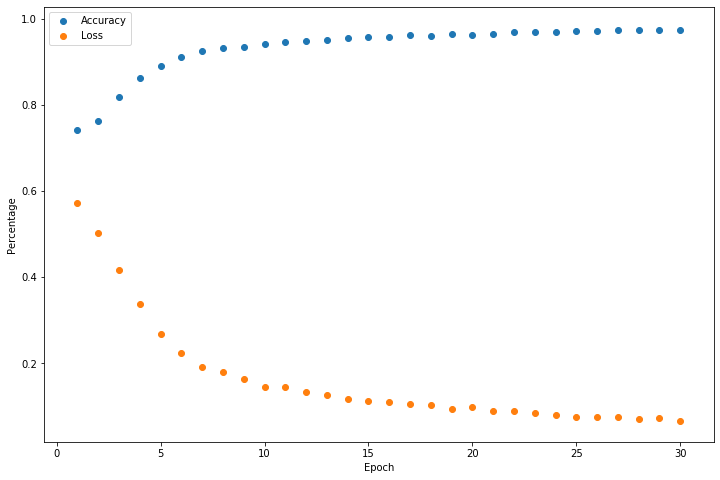

In [30]:
plot_history(history_5)

# Model 6: 256x256

In [76]:
train_generator_6 = ImageDataGenerator(rescale=1./255).flow_from_directory(train_folder, target_size=(256, 256), batch_size= 5218)

test_generator_6 = ImageDataGenerator(rescale=1./255).flow_from_directory(test_folder, target_size=(256, 256), batch_size = 624) 

val_generator_6 = ImageDataGenerator(rescale=1./255).flow_from_directory(val_folder, target_size=(256, 256), batch_size = 18)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [77]:
train_images_6, train_labels_6 = next(train_generator_6)
test_images_6, test_labels_6 = next(test_generator_6)
val_images_6, val_labels_6 = next(val_generator_6)

In [78]:
train_y_6 = np.reshape(train_labels_6[:,0], (5216,1))
test_y_6 = np.reshape(test_labels_6[:,0], (624,1))
val_y_6 = np.reshape(val_labels_6[:,0], (16,1))

In [34]:
model_6 = models.Sequential()
model_6.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model_6.add(layers.MaxPooling2D((2, 2)))

model_6.add(layers.Conv2D(32, (4, 4), activation='relu'))
model_6.add(layers.MaxPooling2D((2, 2)))

model_6.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_6.add(layers.MaxPooling2D((2, 2)))

model_6.add(layers.Flatten())
model_6.add(layers.Dense(64, activation='relu'))
model_6.add(layers.Dense(1, activation='sigmoid'))

model_6.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [37]:
history_6 = model_6.fit(train_images_6,
                    train_y_6,
                    epochs=30,
                    batch_size=50,
                    validation_data=(val_images_6, val_y_6))

Train on 5216 samples, validate on 16 samples
Epoch 1/30
5216/5216 [==============================] - 15s 3ms/step - loss: 0.5372 - acc: 0.7402 - val_loss: 0.6388 - val_acc: 0.6250
Epoch 2/30
5216/5216 [==============================] - 14s 3ms/step - loss: 0.4158 - acc: 0.8098 - val_loss: 0.5777 - val_acc: 0.7500
Epoch 3/30
5216/5216 [==============================] - 14s 3ms/step - loss: 0.3113 - acc: 0.8735 - val_loss: 0.6393 - val_acc: 0.7500
Epoch 4/30
5216/5216 [==============================] - 14s 3ms/step - loss: 0.2366 - acc: 0.9057 - val_loss: 1.0655 - val_acc: 0.6250
Epoch 5/30
5216/5216 [==============================] - 14s 3ms/step - loss: 0.1838 - acc: 0.9275 - val_loss: 0.5573 - val_acc: 0.8125
Epoch 6/30
5216/5216 [==============================] - 14s 3ms/step - loss: 0.1579 - acc: 0.9394 - val_loss: 0.6698 - val_acc: 0.7500
Epoch 7/30
5216/5216 [==============================] - 14s 3ms/step - loss: 0.1421 - acc: 0.9452 - val_loss: 0.8658 - val_acc: 0.5625
Epoch 8/3

In [38]:
results_6 = model_6.evaluate(test_images_6, test_y_6)
results_6

624/624 [==============================] - 1s 1ms/step


[0.7227326111915784, 0.8108974099159241]

Final epoch loss: 0.0693910542584133
Final epoch accuracy: 0.9737347


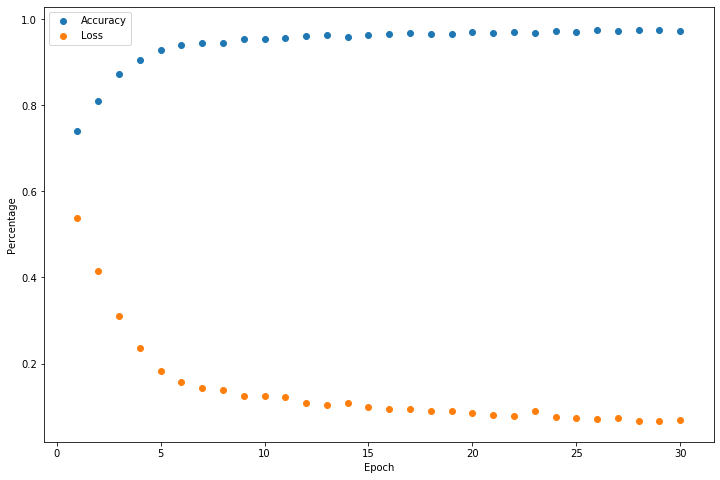

In [39]:
plot_history(history_6)

### 256, color, 100 epochs

In [74]:
model_17 = models.Sequential()
model_17.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model_17.add(layers.MaxPooling2D((2, 2)))

model_17.add(layers.Conv2D(32, (4, 4), activation='relu'))
model_17.add(layers.MaxPooling2D((2, 2)))

model_17.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_17.add(layers.MaxPooling2D((2, 2)))

model_17.add(layers.Flatten())
model_17.add(layers.Dense(64, activation='relu'))
model_17.add(layers.Dense(1, activation='sigmoid'))

model_17.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [79]:
history_17 = model_17.fit(train_images_6,
                    train_y_6,
                    epochs=100,
                    batch_size=50,
                    validation_data=(val_images_6, val_y_6))

Train on 5216 samples, validate on 16 samples
Epoch 1/100
5216/5216 [==============================] - 15s 3ms/step - loss: 0.5442 - acc: 0.7529 - val_loss: 0.6737 - val_acc: 0.5625
Epoch 2/100
5216/5216 [==============================] - 15s 3ms/step - loss: 0.3912 - acc: 0.8315 - val_loss: 1.2547 - val_acc: 0.6250
Epoch 3/100
5216/5216 [==============================] - 15s 3ms/step - loss: 0.2744 - acc: 0.8915 - val_loss: 0.4012 - val_acc: 0.8125
Epoch 4/100
5216/5216 [==============================] - 15s 3ms/step - loss: 0.1966 - acc: 0.9218 - val_loss: 0.7611 - val_acc: 0.5625
Epoch 5/100
5216/5216 [==============================] - 15s 3ms/step - loss: 0.1613 - acc: 0.9404 - val_loss: 0.9406 - val_acc: 0.5625
Epoch 6/100
5216/5216 [==============================] - 15s 3ms/step - loss: 0.1397 - acc: 0.9444 - val_loss: 0.6870 - val_acc: 0.6250
Epoch 7/100
5216/5216 [==============================] - 15s 3ms/step - loss: 0.1338 - acc: 0.9515 - val_loss: 0.3977 - val_acc: 0.8750
Ep

In [80]:
results_17 = model_17.evaluate(test_images_6, test_y_6)
results_17

624/624 [==============================] - 1s 1ms/step


[2.3551576840571866, 0.7580128312110901]

# Model 7: 512  (Too big, doesn't run)

In [4]:
train_generator_7 = ImageDataGenerator(rescale=1./255).flow_from_directory(train_folder, target_size=(512, 512), batch_size= 5218)

test_generator_7 = ImageDataGenerator(rescale=1./255).flow_from_directory(test_folder, target_size=(512, 512), batch_size = 624) 

val_generator_7 = ImageDataGenerator(rescale=1./255).flow_from_directory(val_folder, target_size=(512, 512), batch_size = 18)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [5]:
train_images_7, train_labels_7 = next(train_generator_7)
test_images_7, test_labels_7 = next(test_generator_7)
val_images_7, val_labels_7 = next(val_generator_7)

In [6]:
train_y_7 = np.reshape(train_labels_7[:,0], (5216,1))
test_y_7 = np.reshape(test_labels_7[:,0], (624,1))
val_y_7 = np.reshape(val_labels_7[:,0], (16,1))

In [11]:
model_7 = models.Sequential()
model_7.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(512, 512, 3)))
model_7.add(layers.MaxPooling2D((2, 2)))

model_7.add(layers.Conv2D(32, (4, 4), activation='relu'))
model_7.add(layers.MaxPooling2D((2, 2)))

model_7.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_7.add(layers.MaxPooling2D((2, 2)))

model_7.add(layers.Flatten())
model_7.add(layers.Dense(64, activation='relu'))
model_7.add(layers.Dense(1, activation='sigmoid'))

model_7.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [12]:
history_7 = model_7.fit(train_images_7,
                    train_y_7,
                    epochs=30,
                    batch_size=50,
                    validation_data=(val_images_7, val_y_7))

Train on 5216 samples, validate on 16 samples
Epoch 1/30


ResourceExhaustedError:  OOM when allocating tensor with shape[50,32,510,510] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node conv2d_4/convolution (defined at /.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3009) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_keras_scratch_graph_1709]

Function call stack:
keras_scratch_graph


In [ ]:
results_7 = model_7.evaluate(test_images_7, test_y_7)
results_7

In [ ]:
plot_history(history_7)

### End Augmentation-Free Models

In [31]:
%%time
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.3, 
                                   zoom_range=0.1, 
                                   horizontal_flip=False)

CPU times: user 46 µs, sys: 4 µs, total: 50 µs
Wall time: 56.3 µs


In [80]:
train_generator_2 = train_datagen.flow_from_directory(
        train_folder, 
        target_size=(64, 64), 
        batch_size = 32, 
        class_mode='binary')

test_generator_2 = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(64, 64), 
        batch_size = 32,
        class_mode='binary') 

val_generator_2 = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(64, 64),
        batch_size = 32,
        class_mode='binary')


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [81]:
model_2 = models.Sequential()
model_2.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64, 64, 3)))
model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.Conv2D(32, (4, 4), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.Flatten())
model_2.add(layers.Dense(64, activation='relu'))
model_2.add(layers.Dense(1, activation='sigmoid'))

model_2.compile(loss='binary_crossentropy',
              optimizer= 'sgd',
              metrics=['acc'])

In [82]:
history_2 = model_2.fit_generator(train_generator_2, 
                                steps_per_epoch=25, 
                                epochs=30, 
                                validation_data=val_generator_2, 
                                validation_steps=25)

Epoch 1/30
25/25 [==============================] - 12s 487ms/step - loss: 0.5942 - acc: 0.7400 - val_loss: 0.8696 - val_acc: 0.5000
Epoch 2/30
25/25 [==============================] - 9s 358ms/step - loss: 0.5817 - acc: 0.7400 - val_loss: 0.8673 - val_acc: 0.5000
Epoch 3/30
25/25 [==============================] - 9s 369ms/step - loss: 0.5665 - acc: 0.7525 - val_loss: 0.8774 - val_acc: 0.5000
Epoch 4/30
25/25 [==============================] - 9s 365ms/step - loss: 0.5925 - acc: 0.7275 - val_loss: 0.8063 - val_acc: 0.5000
Epoch 5/30
25/25 [==============================] - 9s 369ms/step - loss: 0.5876 - acc: 0.7250 - val_loss: 0.8318 - val_acc: 0.5000
Epoch 6/30
25/25 [==============================] - 9s 361ms/step - loss: 0.5759 - acc: 0.7437 - val_loss: 0.8303 - val_acc: 0.5000
Epoch 7/30
25/25 [==============================] - 9s 362ms/step - loss: 0.5635 - acc: 0.7538 - val_loss: 0.8201 - val_acc: 0.5000
Epoch 8/30
25/25 [==============================] - 9s 369ms/step - loss: 0

Final epoch loss: 0.5422494590282441
Final epoch accuracy: 0.735


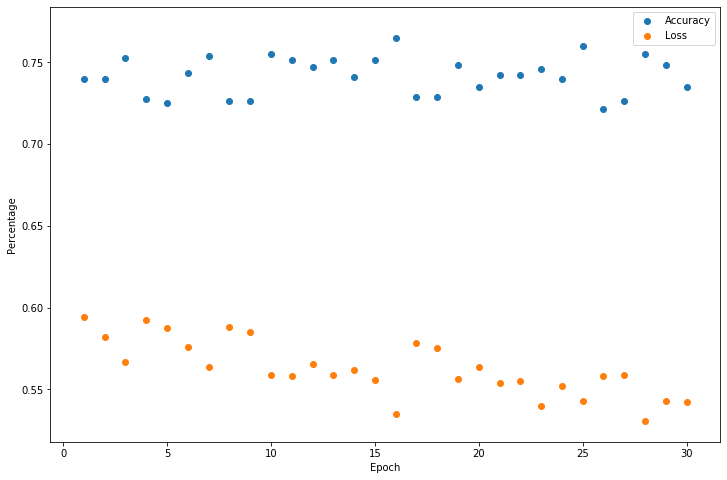

In [83]:
plot_history(history_2)

In [85]:
results_test_2 = model_2.evaluate(test_generator_2)

20/20 [==============================] - 4s 221ms/step


In [94]:
results_test_2

[1.0270255345564623, 0.375]

In [93]:
results_test_2 = model_2.evaluate(test_images, test_y)

624/624 [==============================] - 0s 133us/step


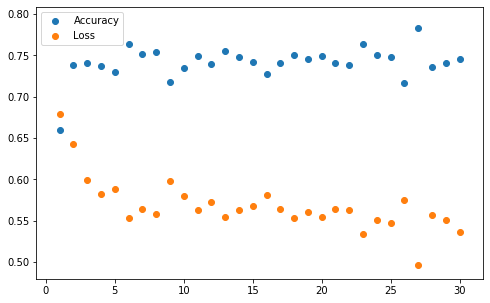

In [36]:
fig = plt.figure(figsize=(8,5))
ax = fig.gca()
ax.scatter(range(1,31), history_2.history['acc'], label = 'Accuracy')
ax.scatter(range(1,31), history_2.history['loss'], label = 'Loss')
ax.legend();

In [37]:
# one extra hidden layer, increasing the biggest convolution to 5x5
model_3 = models.Sequential()
model_3.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
model_3.add(layers.MaxPooling2D((2, 2)))

model_3.add(layers.Conv2D(32, (5, 5), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))

model_3.add(layers.Conv2D(64, (4, 4), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))

model_3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))

model_3.add(layers.Flatten())
model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.Dense(1, activation='sigmoid'))

model_3.compile(loss='binary_crossentropy',
              optimizer= 'sgd',
              metrics=['acc'])

In [38]:
history_3 = model_3.fit_generator(train_generator, 
                                steps_per_epoch=25, 
                                epochs=30, 
                                validation_data=val_generator, 
                                validation_steps=25)

Epoch 1/30
25/25 [==============================] - 12s 475ms/step - loss: 0.6348 - acc: 0.7700 - val_loss: 0.7330 - val_acc: 0.5000
Epoch 2/30
25/25 [==============================] - 9s 362ms/step - loss: 0.6089 - acc: 0.7138 - val_loss: 0.7790 - val_acc: 0.5000
Epoch 3/30
25/25 [==============================] - 9s 341ms/step - loss: 0.5739 - acc: 0.7437 - val_loss: 0.8380 - val_acc: 0.5000
Epoch 4/30
25/25 [==============================] - 9s 358ms/step - loss: 0.5937 - acc: 0.7237 - val_loss: 0.8055 - val_acc: 0.5000
Epoch 5/30
25/25 [==============================] - 9s 358ms/step - loss: 0.5526 - acc: 0.7625 - val_loss: 0.8363 - val_acc: 0.5000
Epoch 6/30
25/25 [==============================] - 9s 350ms/step - loss: 0.5868 - acc: 0.7287 - val_loss: 0.8396 - val_acc: 0.5000
Epoch 7/30
25/25 [==============================] - 9s 361ms/step - loss: 0.5512 - acc: 0.7613 - val_loss: 0.8297 - val_acc: 0.5000
Epoch 8/30
25/25 [==============================] - 9s 350ms/step - loss: 0

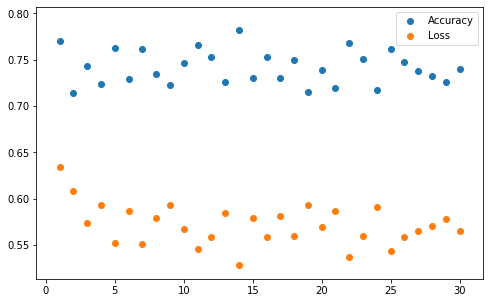

In [39]:
fig = plt.figure(figsize=(8,5))
ax = fig.gca()
ax.scatter(range(1,31), history_3.history['acc'], label = 'Accuracy')
ax.scatter(range(1,31), history_3.history['loss'], label = 'Loss')
ax.legend();

In [43]:
history_3.history['acc'][29]

0.74

In [44]:
history_2.history['acc'][29]

0.745

In [48]:
history_2.history['acc'][-1]

0.745

In [47]:
history.history['acc']

[0.8393405,
 0.87097394,
 0.8934049,
 0.9118098,
 0.91890335,
 0.92197084,
 0.9302147,
 0.9350077,
 0.9355828,
 0.9407592,
 0.9422929,
 0.9459356,
 0.9467025,
 0.94823617,
 0.94996166,
 0.9522623,
 0.953796,
 0.9557132,
 0.9559049,
 0.9608896,
 0.9578221,
 0.9622316,
 0.9631902,
 0.96491563,
 0.9651074,
 0.9664494,
 0.9666411,
 0.9662577,
 0.9695169,
 0.9685583]

In [58]:
len(history_3.history['acc'])

30

In [16]:
def plot_history(history):
    fig = plt.figure(figsize=(12,8))
    ax = fig.gca()
    ax.scatter(range(1,len(history.history['acc']) + 1), history.history['acc'], label = 'Accuracy')
    ax.scatter(range(1,len(history.history['loss']) + 1), history.history['loss'], label = 'Loss')
    ax.legend()
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Percentage');
    print('Final epoch loss:', history.history['loss'][-1])
    print('Final epoch accuracy:', history.history['acc'][-1])


Final epoch loss: 0.5650657665729523
Final epoch accuracy: 0.74


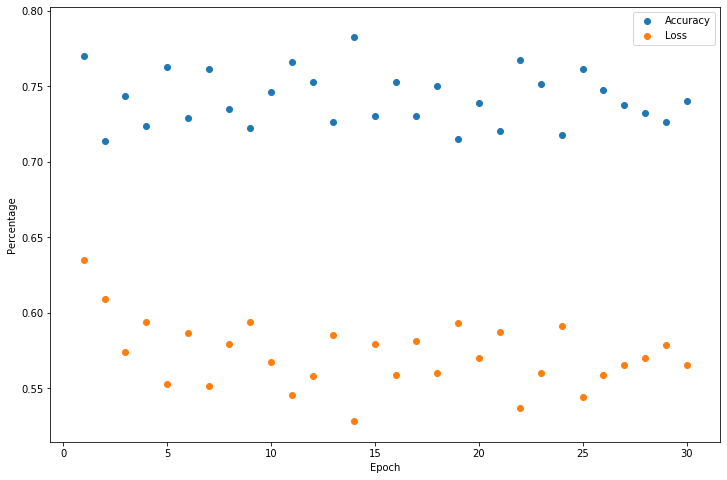

In [62]:
plot_history(history_3)

In [98]:
results_test_3 = model_3.evaluate(test_images, test_y)

624/624 [==============================] - 0s 132us/step


In [99]:
results_test_3

[0.9876789496495173, 0.375]

In [77]:
evaluate_test(model_3, test_images, test_y)

624/624 [==============================] - 0s 135us/step
Loss: 0.9876789496495173
Accuracy: 0.375
